# (Wrong) Zero weight initialization with ReLU, tanh and sigmoid

## ReLU

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from mlxtend.plotting import plot_decision_regions

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/ushape.csv')

In [ ]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [ ]:
df.columns = ['X','Y','class']

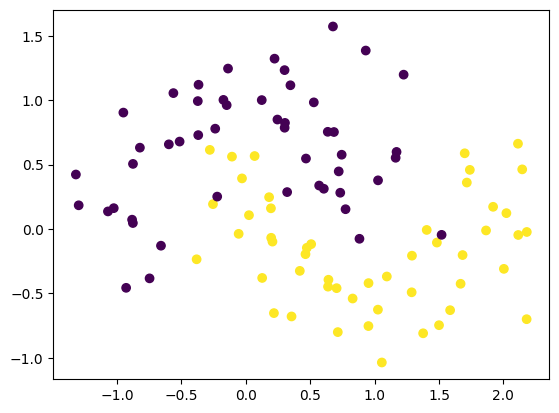

In [ ]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [ ]:
X = df.iloc[:,0:2]
y = df.iloc[:,2]

In [ ]:
model = Sequential()

model.add(Dense(2, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.get_weights()

[array([[-0.0403558 , -0.7942984 ],
        [ 0.73430777,  0.28017235]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.38589716],
        [0.969046  ]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
initial_weights = model.get_weights()
for i in range(len(initial_weights)):
    initial_weights[i] = np.zeros(initial_weights[i].shape)


In [ ]:
initial_weights

[array([[0., 0.],
        [0., 0.]]),
 array([0., 0.]),
 array([[0.],
        [0.]]),
 array([0.])]

In [ ]:
model.set_weights(initial_weights)

In [ ]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 390ms/step - accuracy: 0.4866 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4993 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5383 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5422 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5149 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4954 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5383 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5032 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss

In [ ]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.02777763], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


<Axes: >

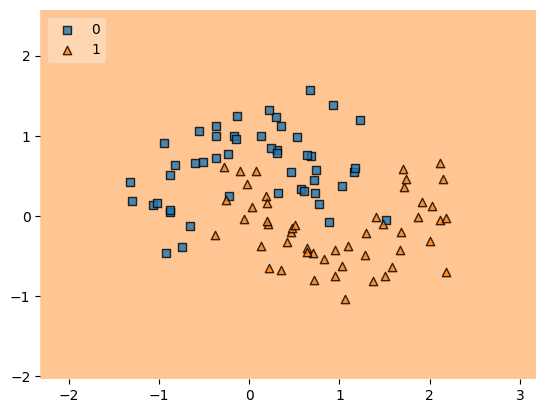

In [ ]:
plot_decision_regions(X.to_numpy(),y.to_numpy().astype('int'), clf=model, legend=2)

As we can see the weights are not trained at all because we used ReLU as activation function and weighted sum is 0 if we take weights and biases as 0, which then results in activation function value to be 0 and finally the derivative to be 0 as well which means the weights will not be updated.

## Tanh

In [ ]:
model = Sequential()

model.add(Dense(2, activation='tanh', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
initial_weights = model.get_weights()
for i in range(len(initial_weights)):
    initial_weights[i] = np.zeros(initial_weights[i].shape)

In [ ]:
model.set_weights(initial_weights)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 543ms/step - accuracy: 0.5320 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5125 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5032 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5618 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5032 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5227 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4797 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5071 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss

In [ ]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.01623075], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

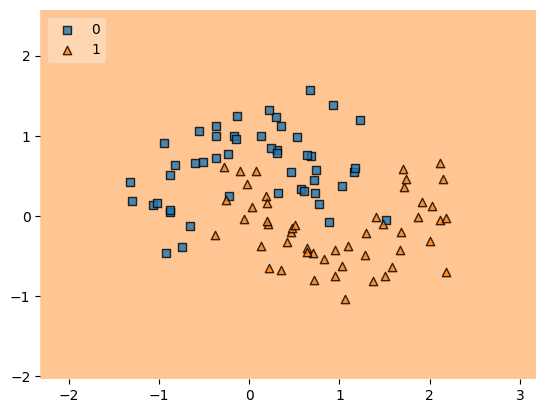

In [ ]:
plot_decision_regions(X.to_numpy(),y.to_numpy().astype('int'), clf=model, legend=2)

As we can see the weights are not trained at all because we used ReLU as activation function and weighted sum is 0 if we take weights and biases as 0, which then results in activation function value to be 0 and finally the derivative to be 0 as well which means the weights will not be updated.

## Sigmoid

In [ ]:
model = Sequential()

model.add(Dense(4, activation='sigmoid', input_dim=2))
model.add(Dense(2, activation='sigmoid', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25 (100.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
initial_weights = model.get_weights()
for i in range(len(initial_weights)):
    initial_weights[i] = np.zeros(initial_weights[i].shape)

In [ ]:
model.set_weights(initial_weights)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 483ms/step - accuracy: 0.5203 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4466 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4968 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.4968 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5071 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.4954 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4680 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4875 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss

In [ ]:
model.get_weights()

[array([[-0.4001364 , -0.4001364 , -0.4001364 , -0.4001364 ],
        [ 0.41877493,  0.41877493,  0.41877493,  0.41877493]],
       dtype=float32),
 array([0.01325079, 0.01325079, 0.01325079, 0.01325079], dtype=float32),
 array([[-0.10073493, -0.10073493],
        [-0.10073493, -0.10073493],
        [-0.10073493, -0.10073493],
        [-0.10073493, -0.10073493]], dtype=float32),
 array([0.00101122, 0.00101122], dtype=float32),
 array([[0.01471897],
        [0.01471897]], dtype=float32),
 array([0.01097976], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

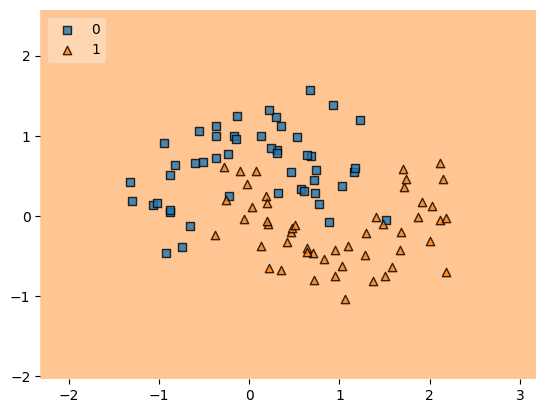

In [ ]:
plot_decision_regions(X.to_numpy(),y.to_numpy().astype('int'), clf=model, legend=2)

As we can see neurons of same layer have the same weight and biases which means even though we add multiple neurons in a layer all of them will function as a single neuron/perceptron. So we will not be able to capture non-linerity in data.

# (Wrong) Non-0 constant value

## ReLU

In [ ]:
model = Sequential()

model.add(Dense(2, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.get_weights()

[array([[ 1.1554648 , -0.8425938 ],
        [ 0.76080465, -0.88201964]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-1.2525022],
        [-0.9372245]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
initial_weights = model.get_weights()

In [ ]:
for i in range(len(initial_weights)):
    initial_weights[i] = np.ones(initial_weights[i].shape) * 0.5

In [ ]:
model.set_weights(initial_weights)

In [ ]:
model.get_weights()

[array([[0.5, 0.5],
        [0.5, 0.5]], dtype=float32),
 array([0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X, y, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 389ms/step - accuracy: 0.4524 - loss: 0.9979 - val_accuracy: 0.5000 - val_loss: 0.8209
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5071 - loss: 0.9244 - val_accuracy: 0.5000 - val_loss: 0.8182
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5071 - loss: 0.9270 - val_accuracy: 0.5000 - val_loss: 0.8153
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5110 - loss: 0.9114 - val_accuracy: 0.5000 - val_loss: 0.8125
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5227 - loss: 0.8788 - val_accuracy: 0.5000 - val_loss: 0.8097
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5305 - loss: 0.8607 - val_accuracy: 0.5000 - val_loss: 0.8070
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5188 - loss: 0.8807 - val_accuracy: 0.5000 - val_loss: 0.8043
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5461 - loss: 0.8496 - val_accuracy: 0.5000 - val_loss

In [ ]:
model.get_weights()

[array([[0.53655946, 0.53655946],
        [0.25426194, 0.25426194]], dtype=float32),
 array([0.30639684, 0.30639684], dtype=float32),
 array([[0.29192027],
        [0.29192027]], dtype=float32),
 array([0.25686875], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

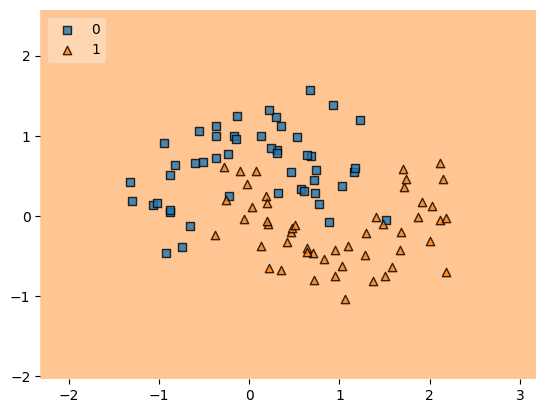

In [ ]:
plot_decision_regions(X.to_numpy(),y.to_numpy().astype('int'), clf=model, legend=2)

## Sigmoid

In [ ]:
model = Sequential()

model.add(Dense(2, activation='sigmoid', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
initial_weights = model.get_weights()

In [ ]:
for i in range(len(initial_weights)):
    initial_weights[i] = np.ones(initial_weights[i].shape) * 0.5

In [ ]:
model.set_weights(initial_weights)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X, y, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 427ms/step - accuracy: 0.4954 - loss: 0.8679 - val_accuracy: 0.5000 - val_loss: 0.8362
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5344 - loss: 0.8178 - val_accuracy: 0.5000 - val_loss: 0.8342
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4875 - loss: 0.8729 - val_accuracy: 0.5000 - val_loss: 0.8321
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5149 - loss: 0.8386 - val_accuracy: 0.5000 - val_loss: 0.8301
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4875 - loss: 0.8724 - val_accuracy: 0.5000 - val_loss: 0.8280
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4914 - loss: 0.8602 - val_accuracy: 0.5000 - val_loss: 0.8260
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5227 - loss: 0.8244 - val_accuracy: 0.5000 - val_loss: 0.8240
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5227 - loss: 0.8276 - val_accuracy: 0.5000 - val_loss

In [ ]:
model.get_weights()

[array([[0.70535946, 0.70535946],
        [0.24583335, 0.24583335]], dtype=float32),
 array([0.27707866, 0.27707866], dtype=float32),
 array([[0.26955113],
        [0.26955113]], dtype=float32),
 array([0.25538185], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

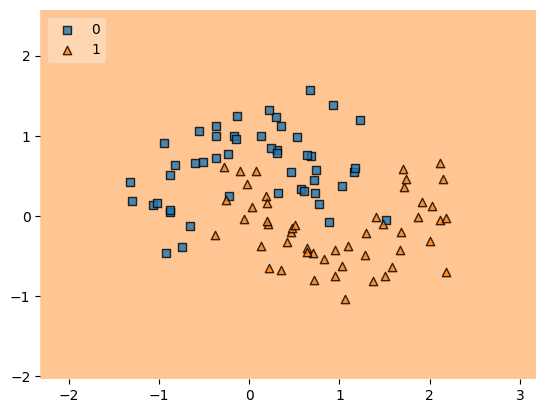

In [ ]:
plot_decision_regions(X.to_numpy(),y.to_numpy().astype('int'), clf=model, legend=2)

## Tanh

In [ ]:
model = Sequential()

model.add(Dense(2, activation='tanh', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
initial_weights = model.get_weights()

In [ ]:
for i in range(len(initial_weights)):
    initial_weights[i] = np.ones(initial_weights[i].shape) * 0.5

In [ ]:
model.set_weights(initial_weights)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X, y, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 597ms/step - accuracy: 0.5110 - loss: 0.8340 - val_accuracy: 0.5000 - val_loss: 0.7755
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.4954 - loss: 0.8578 - val_accuracy: 0.5000 - val_loss: 0.7731
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5227 - loss: 0.8235 - val_accuracy: 0.5000 - val_loss: 0.7707
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5188 - loss: 0.8230 - val_accuracy: 0.5000 - val_loss: 0.7683
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5110 - loss: 0.8159 - val_accuracy: 0.5000 - val_loss: 0.7658
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4914 - loss: 0.8409 - val_accuracy: 0.5000 - val_loss: 0.7635
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5500 - loss: 0.7803 - val_accuracy: 0.5000 - val_loss: 0.7612
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5032 - loss: 0.8335 - val_accuracy: 0.5000 - val_loss

In [ ]:
model.get_weights()

[array([[0.70908123, 0.70908123],
        [0.22519553, 0.22519553]], dtype=float32),
 array([0.26092735, 0.26092735], dtype=float32),
 array([[0.3024441],
        [0.3024441]], dtype=float32),
 array([0.25546643], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

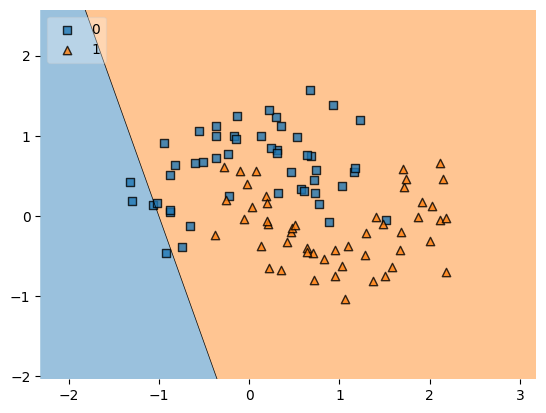

In [ ]:
plot_decision_regions(X.to_numpy(),y.to_numpy().astype('int'), clf=model, legend=2)

# (Wrong) Small random values

## Tanh

In [ ]:
model = Sequential()

model.add(Dense(2, activation='tanh', input_dim=2))
model.add(Dense(2, activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27 (108.00 B)

 Trainable params: 27 (108.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
initial_weights = model.get_weights()

In [ ]:
initial_weights[0].shape

(2, 2)

In [ ]:
for i in range(len(initial_weights)):
    if i%2==0:
        initial_weights[i] = np.random.randn(initial_weights[i].shape[0], initial_weights[i].shape[1]) * 0.001
    else:
        initial_weights[i] = np.zeros(initial_weights[i].shape)

In [ ]:
model.set_weights(initial_weights)

In [ ]:
model.get_weights() # All weights are very small and biases are 0

[array([[ 0.00093126, -0.00034302],
        [-0.00113666,  0.0004242 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.00089325, -0.00082727],
        [-0.00133421,  0.00098858]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.0017802 ,  0.0003883 ],
        [ 0.00087655, -0.00031563]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.00137138,  0.00025005],
        [-0.00079402, -0.00020894]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.0016568 ],
        [0.00101409]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X, y, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 518ms/step - accuracy: 0.5007 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5275 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5032 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5149 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4758 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4954 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4719 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4954 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss

In [ ]:
model.get_weights()

[array([[ 0.00093129, -0.00034289],
        [-0.0011367 ,  0.00042406]], dtype=float32),
 array([-1.948648e-09, -7.149363e-09], dtype=float32),
 array([[-0.0008934 , -0.0008272 ],
        [-0.00133416,  0.00098855]], dtype=float32),
 array([ 3.9415654e-06, -1.9045738e-06], dtype=float32),
 array([[-0.00178012,  0.00038819],
        [ 0.0008764 , -0.00031553]], dtype=float32),
 array([-0.00114176,  0.00025447], dtype=float32),
 array([[-0.00471927, -0.0047135 ],
        [ 0.00285092,  0.00433486]], dtype=float32),
 array([-0.00217228, -0.00455982], dtype=float32),
 array([[ 0.0022013 ],
        [-0.00458924]], dtype=float32),
 array([0.01485486], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


<Axes: >

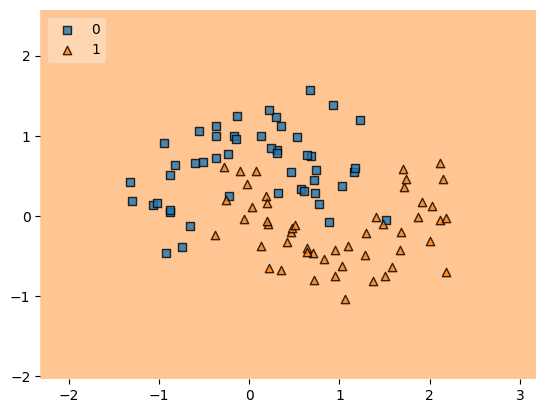

In [ ]:
plot_decision_regions(X.to_numpy(), y.to_numpy().astype('int'), clf=model, legend=2)

There are very minute change in the weights and biases which shows the vanishing gradient problem

## ReLU

In [ ]:
model = Sequential()

model.add(Dense(2, activation='relu', input_dim=2))
model.add(Dense(2, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27 (108.00 B)

 Trainable params: 27 (108.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
initial_weights = model.get_weights()

In [ ]:
for i in range(len(initial_weights)):
    if i%2==0:
        initial_weights[i] = np.random.randn(initial_weights[i].shape[0], initial_weights[i].shape[1]) * 0.001
    else:
        initial_weights[i] = np.zeros(initial_weights[i].shape)

In [ ]:
model.set_weights(initial_weights)

In [ ]:
model.get_weights()

[array([[-0.00011456, -0.00066278],
        [-0.00098214, -0.00033607]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.00213482, -0.00044759],
        [-0.00021615,  0.00258139]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.00126492, -0.00071502],
        [-0.00075707,  0.0003087 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.0016875 ,  0.00142965],
        [-0.00177754,  0.00097194]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.00047157],
        [0.00021536]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X, y, epochs=500, validation_split=0.2)

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 661ms/step - accuracy: 0.4183 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5149 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5149 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5149 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5188 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4758 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5110 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5071 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss

In [ ]:
model.get_weights()

[array([[-0.00011456, -0.00066278],
        [-0.00098214, -0.00033607]], dtype=float32),
 array([ 0.0000000e+00, -1.4788188e-11], dtype=float32),
 array([[-0.00213482, -0.00044759],
        [-0.00021615,  0.00258139]], dtype=float32),
 array([ 0.000000e+00, -5.728755e-09], dtype=float32),
 array([[-0.00126492, -0.00071502],
        [-0.00075707,  0.0003087 ]], dtype=float32),
 array([ 0.0000000e+00, -1.8500787e-05], dtype=float32),
 array([[-0.0016875 ,  0.00142965],
        [-0.00177754,  0.00097194]], dtype=float32),
 array([ 0.        , -0.00456852], dtype=float32),
 array([[0.00047157],
        [0.00021536]], dtype=float32),
 array([0.02733893], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step


<Axes: >

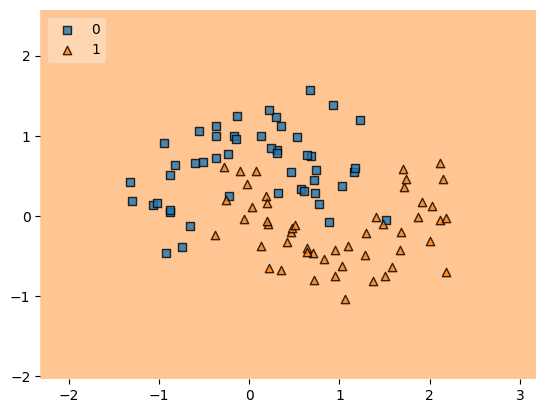

In [ ]:
plot_decision_regions(X.to_numpy(), y.to_numpy().astype('int'), clf=model, legend=2)